The project is based on the data from:
https://www.kaggle.com/uciml/forest-cover-type-dataset

It is a classification problem.

# Exloratory Data Analysis

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.base import clone
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from confusion import pretty_plot_confusion_matrix #this is from my local computer
import math

In [2]:
data=pd.read_csv('covtype.csv')

In [3]:
data.shape

(581012, 55)

In [5]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
# Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Our target is 'Cover_Type' and it has 7 classes. It is very imbalanced!

In [5]:
data['Cover_Type'].dtypes
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

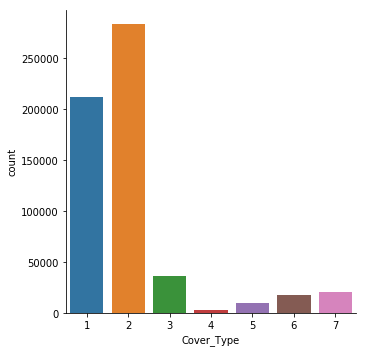

In [6]:
sns.catplot(x="Cover_Type", kind="count",  data=data);

We creat two new columns 'Wilderness_Area' and 'Soil_Type' for visualization. Later we will drop them.

In [7]:
data.loc[:,'Wilderness_Area'] = 1*data['Wilderness_Area1']+2*data['Wilderness_Area2']+3*data['Wilderness_Area3']+4*data['Wilderness_Area4']


In [8]:
data.loc[:,'Soil_Type']=data['Soil_Type1']
for i in range(2,41):
    data.loc[:,'Soil_Type']=data.loc[:,'Soil_Type']+i*data.loc[:,'Soil_Type'+str(i)]

Let's look at the distribution of the Wilderness_Area.

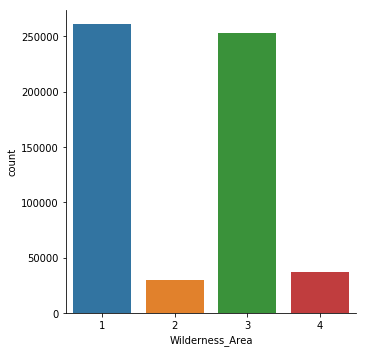

In [9]:
sns.catplot(x="Wilderness_Area", kind="count",  data=data);

Let's look at the distribution of the Soil_Type.

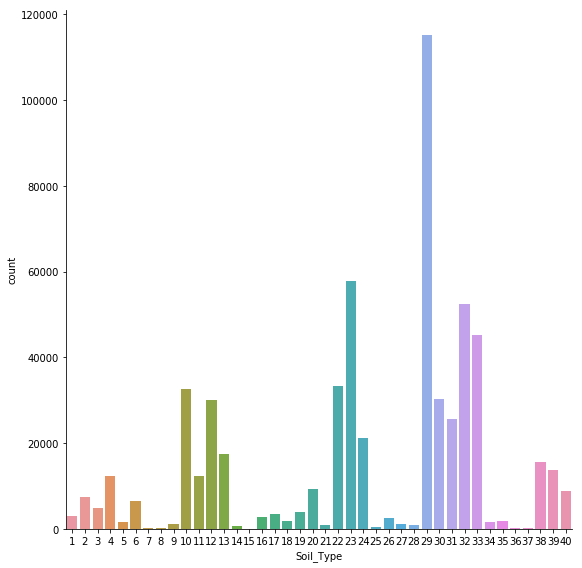

In [10]:
sns.catplot(x="Soil_Type", kind="count",height=8, aspect=1,  data=data);

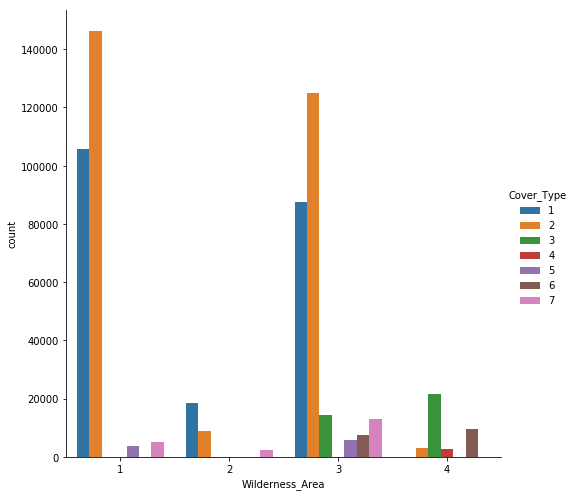

In [11]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count',height=7, aspect=1, data=data);


Let's look at each wilderness_Area seperately.

Text(0.5, 21.70625000000002, 'Wilderness_Area=1')

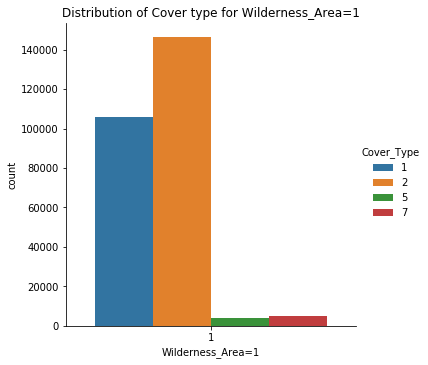

In [12]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==1]);
plt.title("Distribution of Cover type for Wilderness_Area=1")
plt.xlabel('Wilderness_Area=1')

There is no Cover type 3, 4 and 6 with 'Wilderness_Area' = 1

In [14]:
sum((data['Wilderness_Area']==1) & ((data['Cover_Type']==3) | (data['Cover_Type']==4) | (data['Cover_Type']==6)))

0

Text(0.5, 21.70625000000002, 'Wilderness_Area=2')

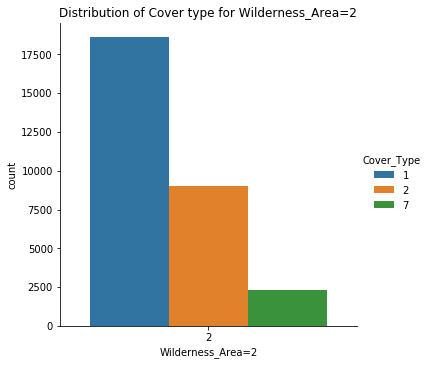

In [15]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==2]);
plt.title("Distribution of Cover type for Wilderness_Area=2")
plt.xlabel('Wilderness_Area=2')

As we see above, there is no cover type 3,4,5,6 in Wilderness_Area=2

Text(0.5, 21.70625000000002, 'Wilderness_Area=3')

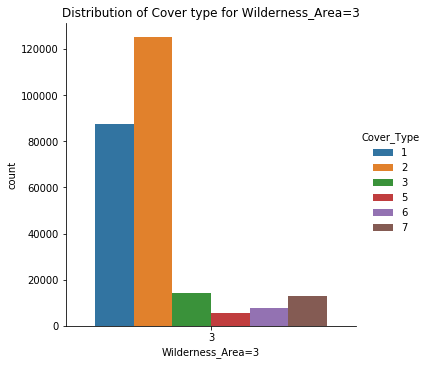

In [16]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==3]);
plt.title("Distribution of Cover type for Wilderness_Area=3")
plt.xlabel('Wilderness_Area=3')

Text(0.5, 21.70625000000002, 'Wilderness_Area=4')

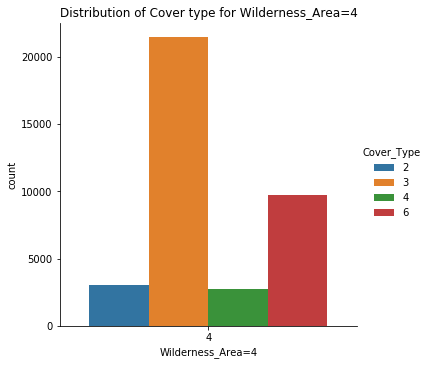

In [17]:
sns.catplot(x="Wilderness_Area", hue="Cover_Type",kind='count', data=data.loc[data['Wilderness_Area']==4]);
plt.title("Distribution of Cover type for Wilderness_Area=4")
plt.xlabel('Wilderness_Area=4')

Text(0.5, 1.0, 'Distribution of Cover type for Soil_Type')

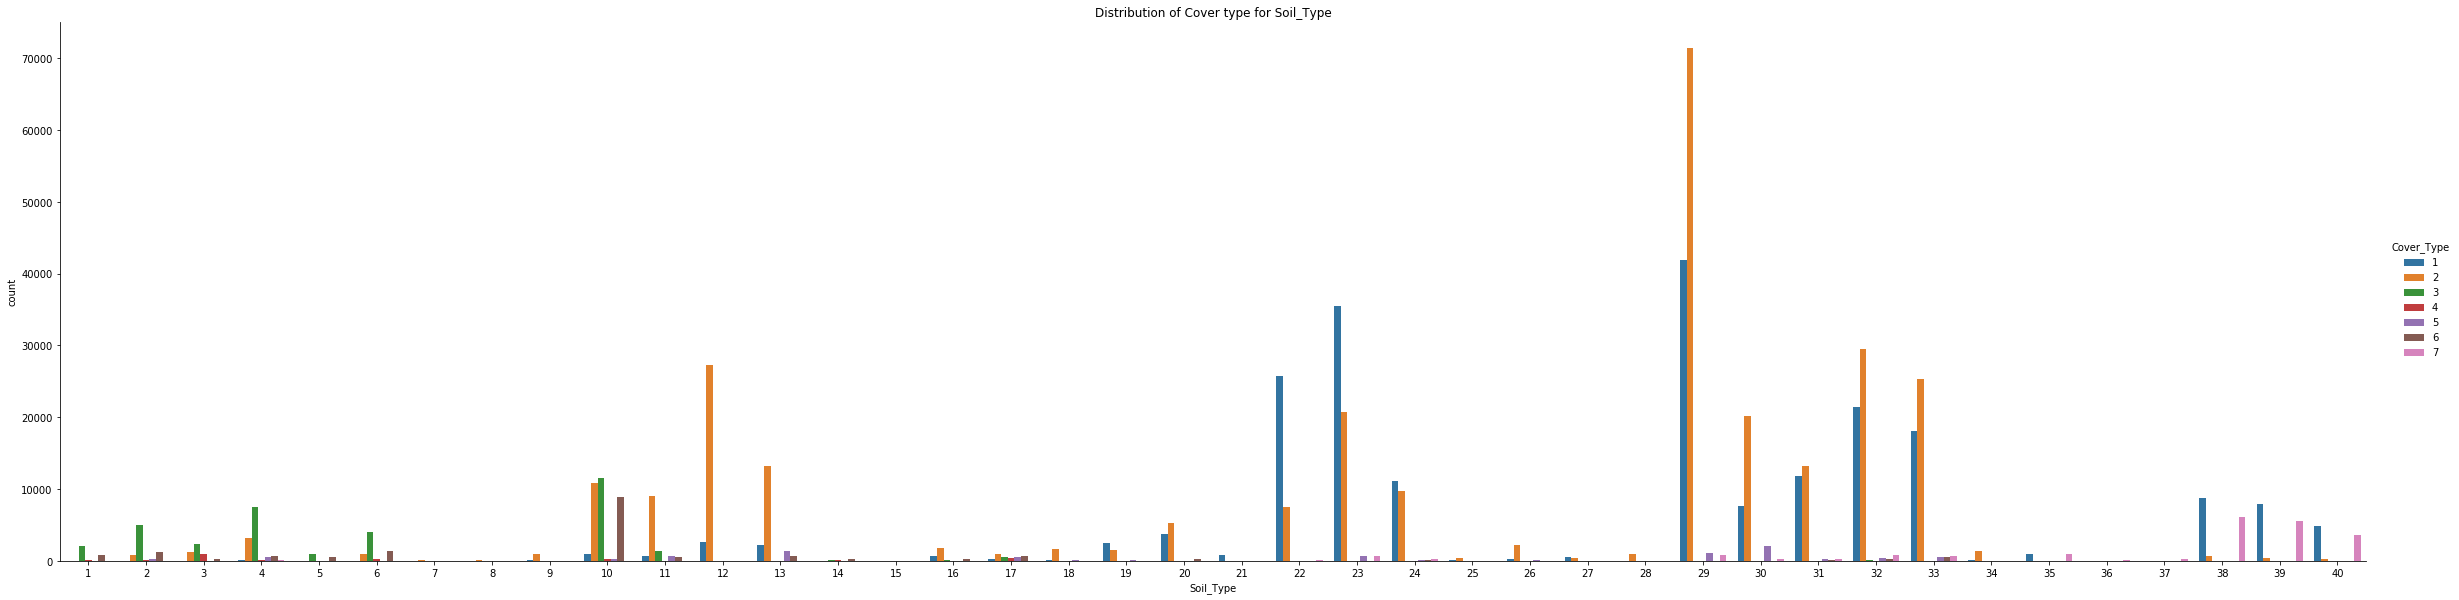

In [18]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data);
plt.title("Distribution of Cover type for Soil_Type")


Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

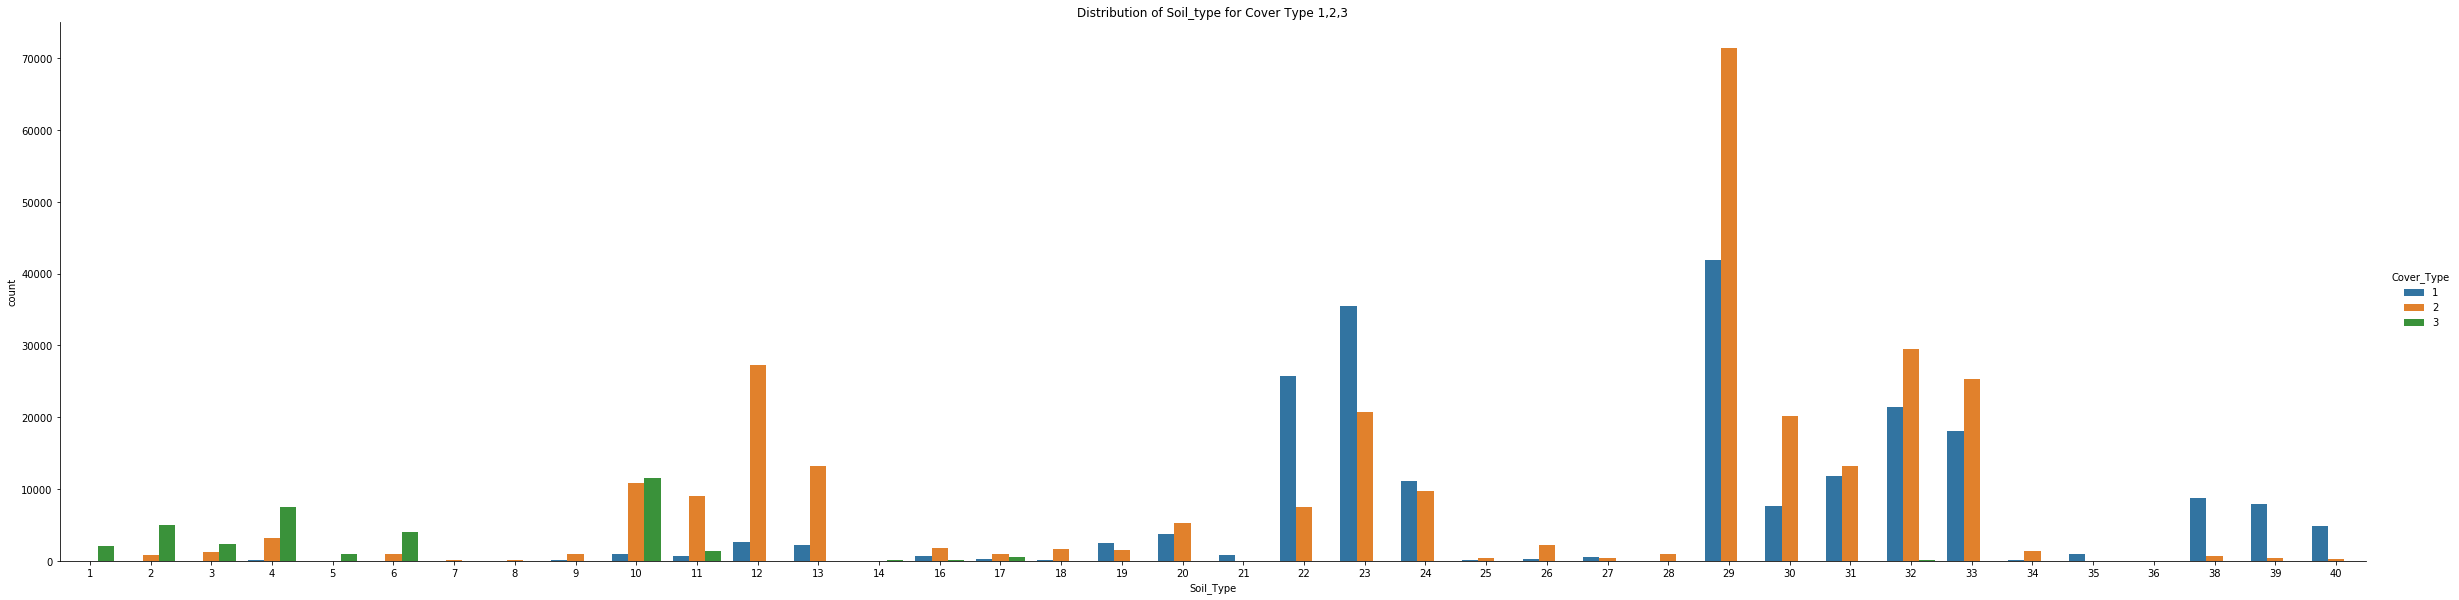

In [19]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[(data['Cover_Type']==1) | (data['Cover_Type']==2) | (data['Cover_Type']==3)]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

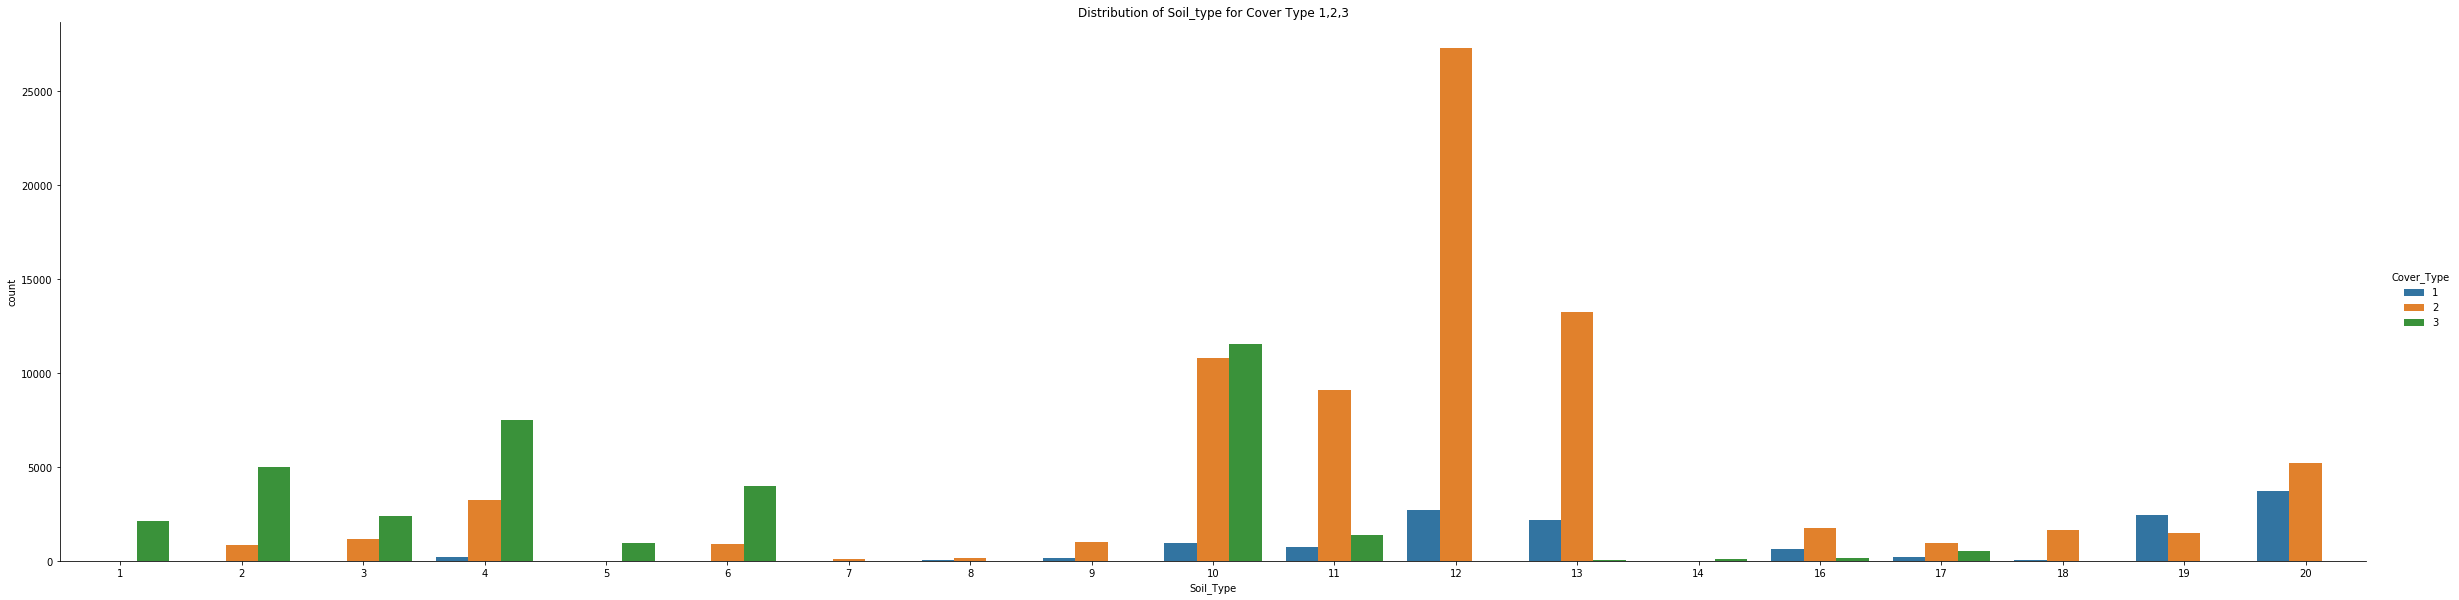

In [20]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[(data['Cover_Type']<=3) & (data['Soil_Type']<=20) ]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of Soil_type for Cover Type 1,2,3')

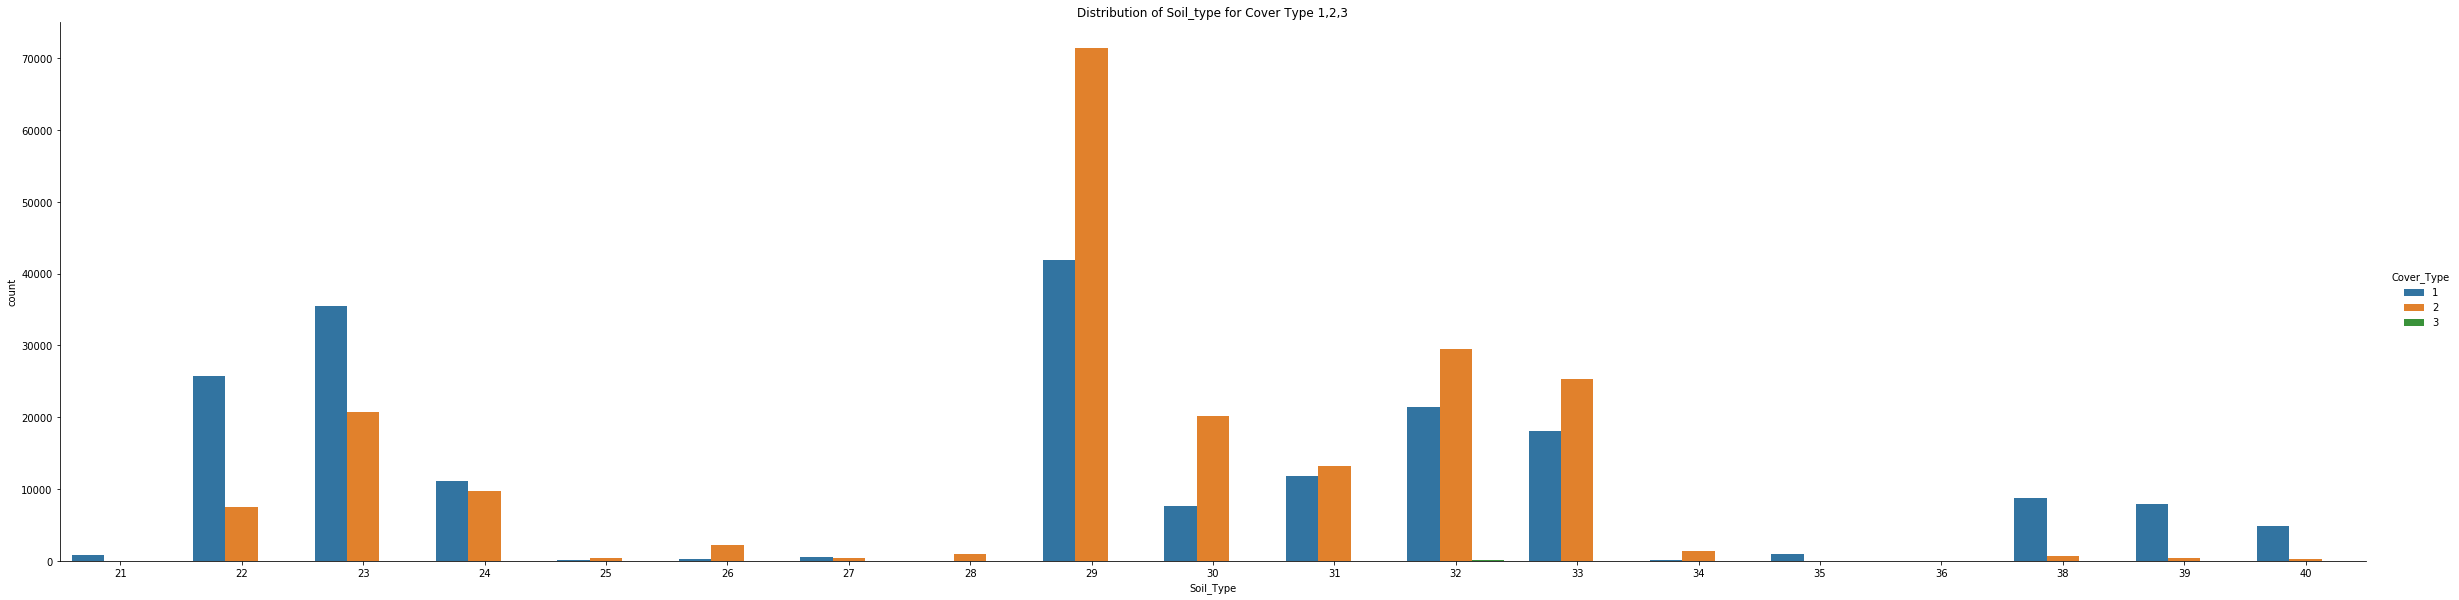

In [21]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count',height=8.27, aspect=4, data=data.loc[((data['Cover_Type']<=3)) & (data['Soil_Type']>20) ]);
plt.title("Distribution of Soil_type for Cover Type 1,2,3")

Text(0.5, 1.0, 'Distribution of soil type for cover type 4, 5')

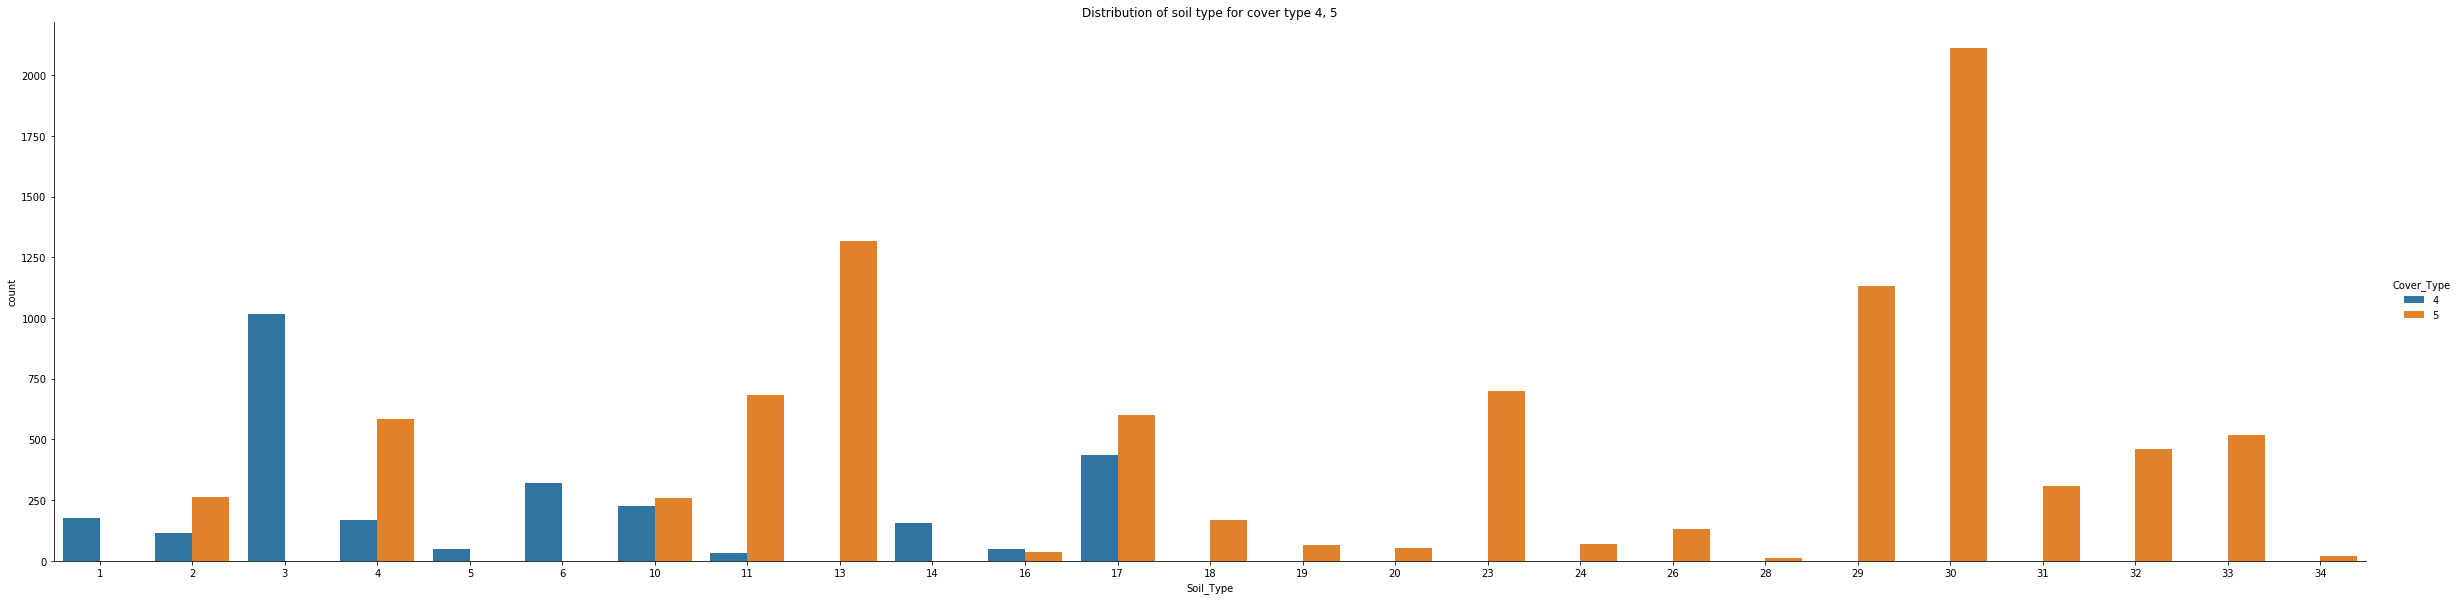

In [22]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count', height=8.27, aspect=4,data=data.loc[(data['Cover_Type']==4) | (data['Cover_Type']==5) ])
plt.title("Distribution of soil type for cover type 4, 5")

Let's look at the Cover_type 1 and 2 more closely. It seems that very small percentage of data are of  cover_type 1, for soil type 1,2,...,9:

Text(0.5, 1.0, 'Distribution of soil type for cover type 6,7')

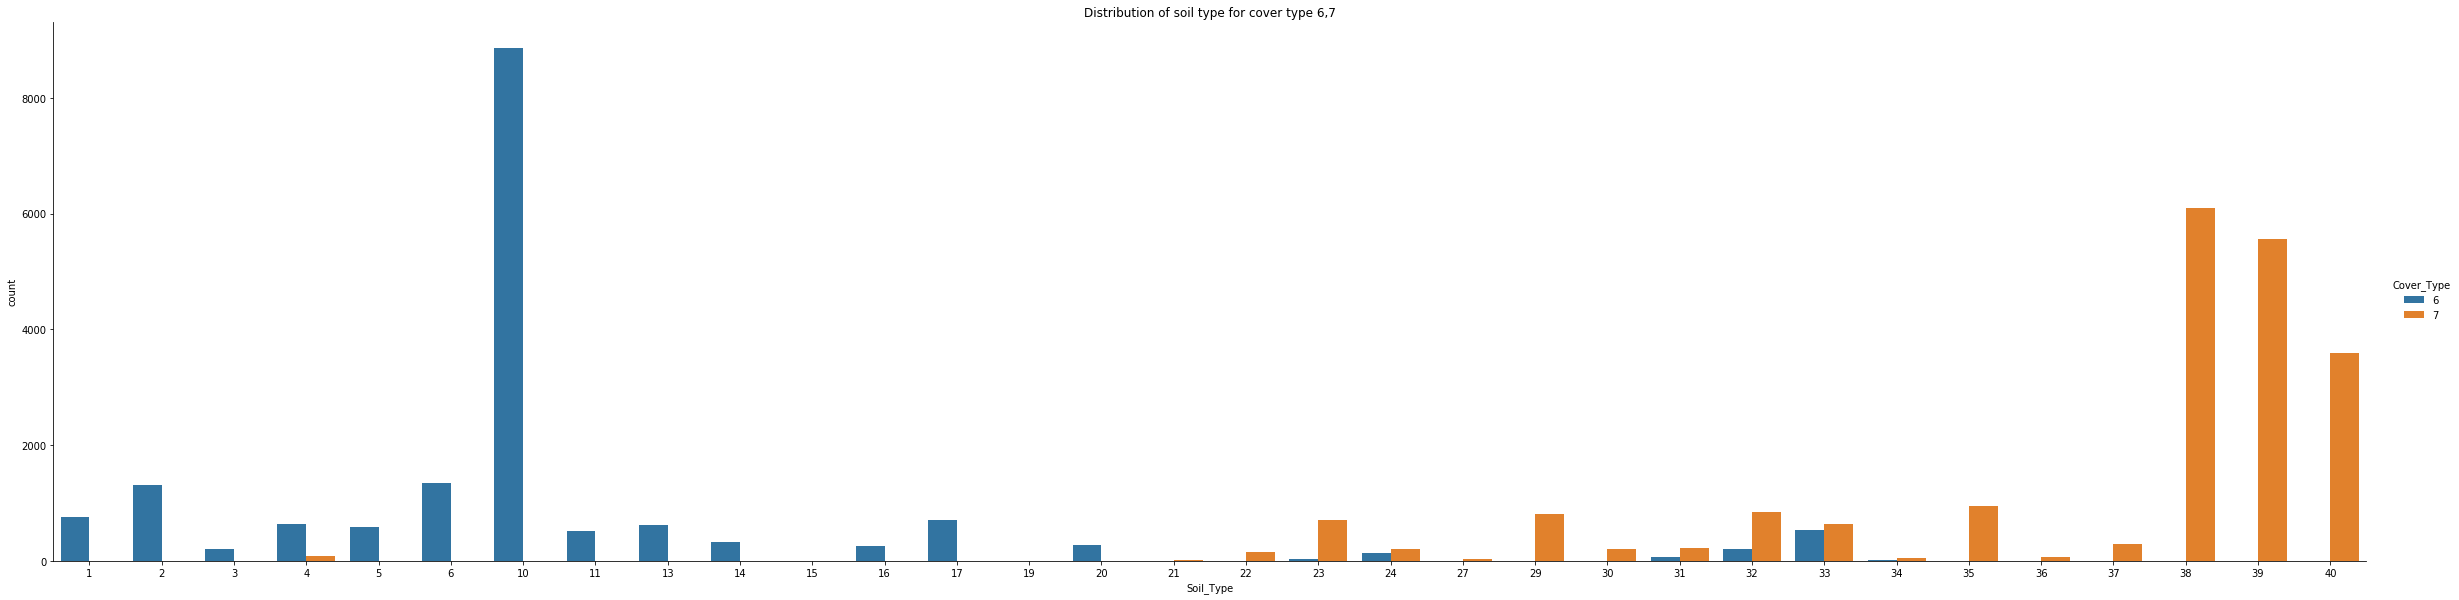

In [23]:
sns.catplot(x="Soil_Type", hue="Cover_Type",kind='count', height=8.27, aspect=4,data=data.loc[(data['Cover_Type']==6) | (data['Cover_Type']==7) ])
plt.title("Distribution of soil type for cover type 6,7")

In [24]:
(sum((data['Cover_Type']==1) & (data['Soil_Type']<10))/sum(data['Cover_Type']==1))*100


0.1822129909365559

As we see above, only 0.18 percent of the cover type 1 are of soil type 1,2,...,9

In [25]:
(sum((data['Cover_Type']==1) & (data['Soil_Type']<10))/data.shape[0])*100

0.06643580511245895

As we see above, only 0.06 percent of the data  are of soil type 1,2,...,9 and cover type 1

Text(0.5, 1.0, 'Distribution of')

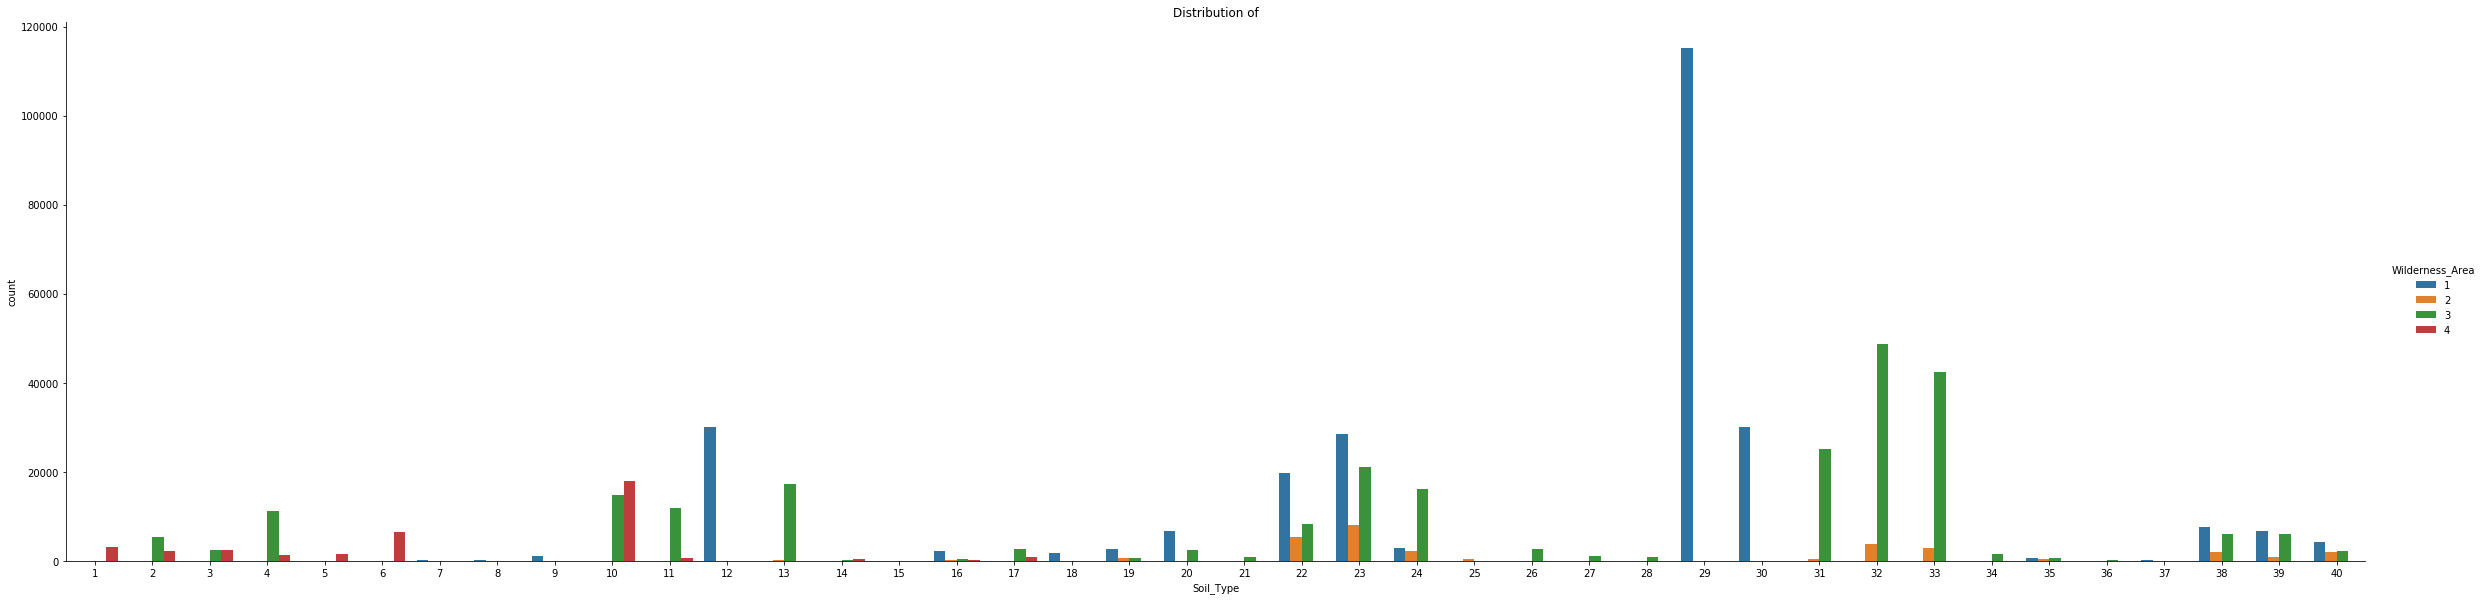

In [26]:
sns.catplot(x="Soil_Type", hue="Wilderness_Area",kind='count', height=8.27, aspect=4,data=data)
plt.title("Distribution of")

# Continuous variables

We  choose randomly .001 percent of the data from  continuous  features.

In [8]:
data_sample = data.sample(frac = 0.001)


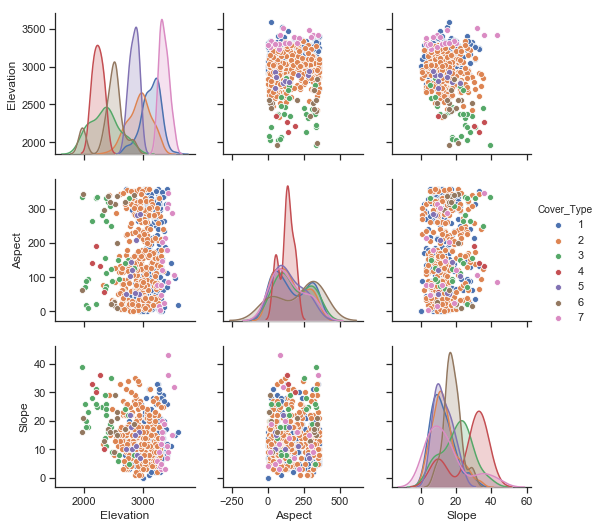

In [32]:
sns.set(style="ticks")

sns.pairplot(data_sample, hue="Cover_Type", vars = num_fea.columns[0:3])

In [33]:
normalized_num_fea = pd.DataFrame(preprocessing.scale(num_fea), columns= num_fea.columns)

/Users/shahla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


[Text(0, 0, 'Elevation'),
 Text(0, 0, 'Aspect'),
 Text(0, 0, 'Slope'),
 Text(0, 0, 'Horizontal_Distance_To_Hydrology'),
 Text(0, 0, 'Vertical_Distance_To_Hydrology'),
 Text(0, 0, 'Horizontal_Distance_To_Roadways'),
 Text(0, 0, 'Hillshade_9am'),
 Text(0, 0, 'Hillshade_Noon'),
 Text(0, 0, 'Hillshade_3pm'),
 Text(0, 0, 'Horizontal_Distance_To_Fire_Points')]

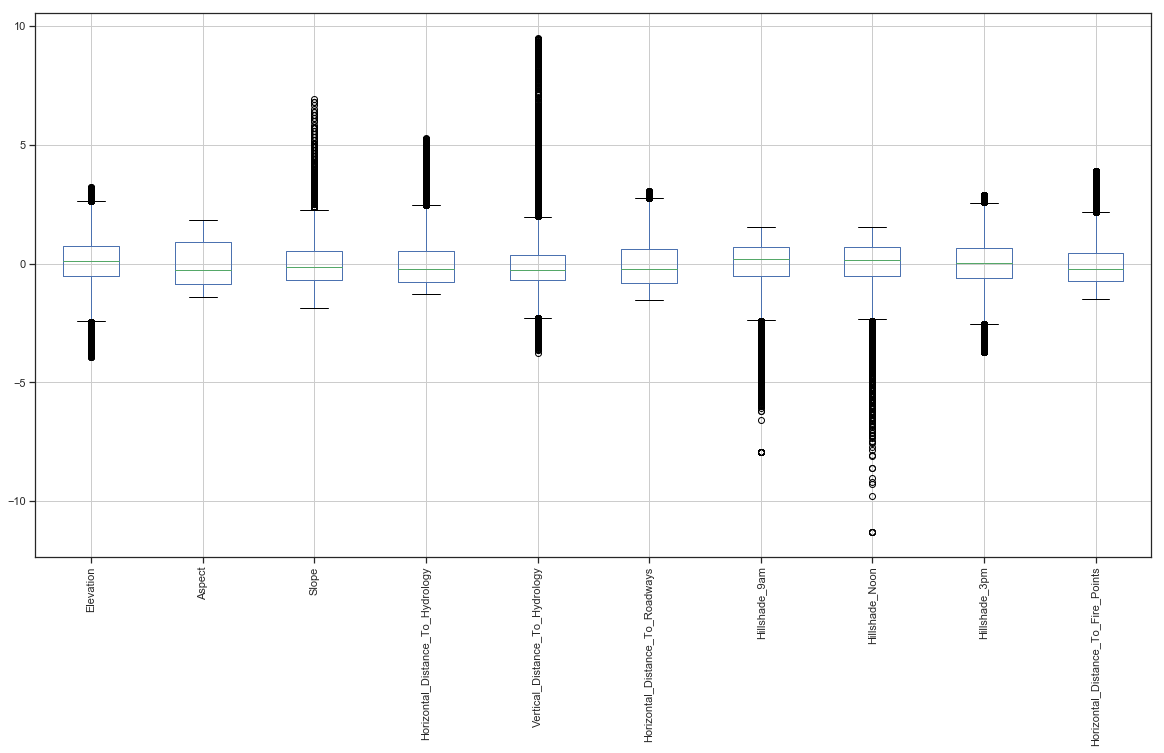

In [34]:
ax=normalized_num_fea.boxplot( figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# PCA
Let's subsample from each class of Cover_Type:


In [27]:
balanced_data=data.groupby('Cover_Type',as_index = False,group_keys=False).apply(lambda s: s.sample(2747,replace=True))

Then we remove  the columns which was created for visualization. 

In [9]:
balanced_data = balanced_data.drop(['Soil_Type','Wilderness_Area'],axis=1)

Text(0.5, 1.0, 'Multi-Collinearity')

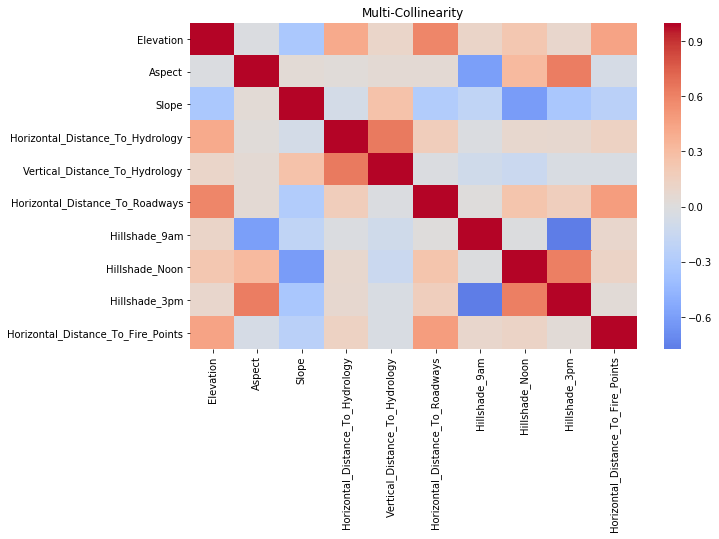

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(balanced_data[num_fea.columns].corr(), center=0,cmap='coolwarm')
ax.set_title('Multi-Collinearity')

In [9]:
balanced_normalized_num_fea = pd.DataFrame(preprocessing.scale(balanced_data[num_fea.columns]), columns= num_fea.columns,index=balanced_data.index)


/Users/shahla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [74]:
balanced_normalized_num_fea.shape

(19229, 10)

In [75]:
n_components=10

In [76]:
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(balanced_normalized_num_fea)


In [77]:
pca_columns = []
for i in range(1,n_components+1):
    pca_columns.append('principal_component'+str(i))

In [78]:
pca_data = pd.DataFrame(pca_data,index=balanced_normalized_num_fea.index,columns=pca_columns)


In [79]:
pca_data['Cover_Type'] = balanced_data['Cover_Type']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

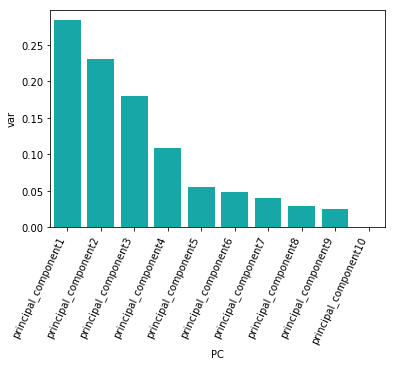

In [81]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':pca_columns})
g=sns.barplot(x='PC',y="var", data=df, color="c")
plt.xticks(rotation=65, horizontalalignment='right')

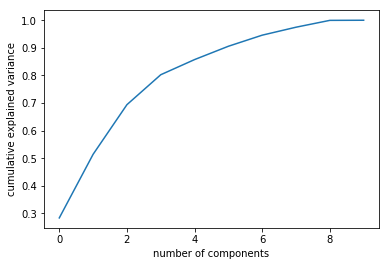

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total within the first N components. For example, we see that with the digits the first 6 components contain approximately 91% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 6 components to retain 91% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

In [84]:
sample_data = pca_data.sample(140,replace=False)

In [85]:
sample_data.shape

(140, 11)

/Users/shahla/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


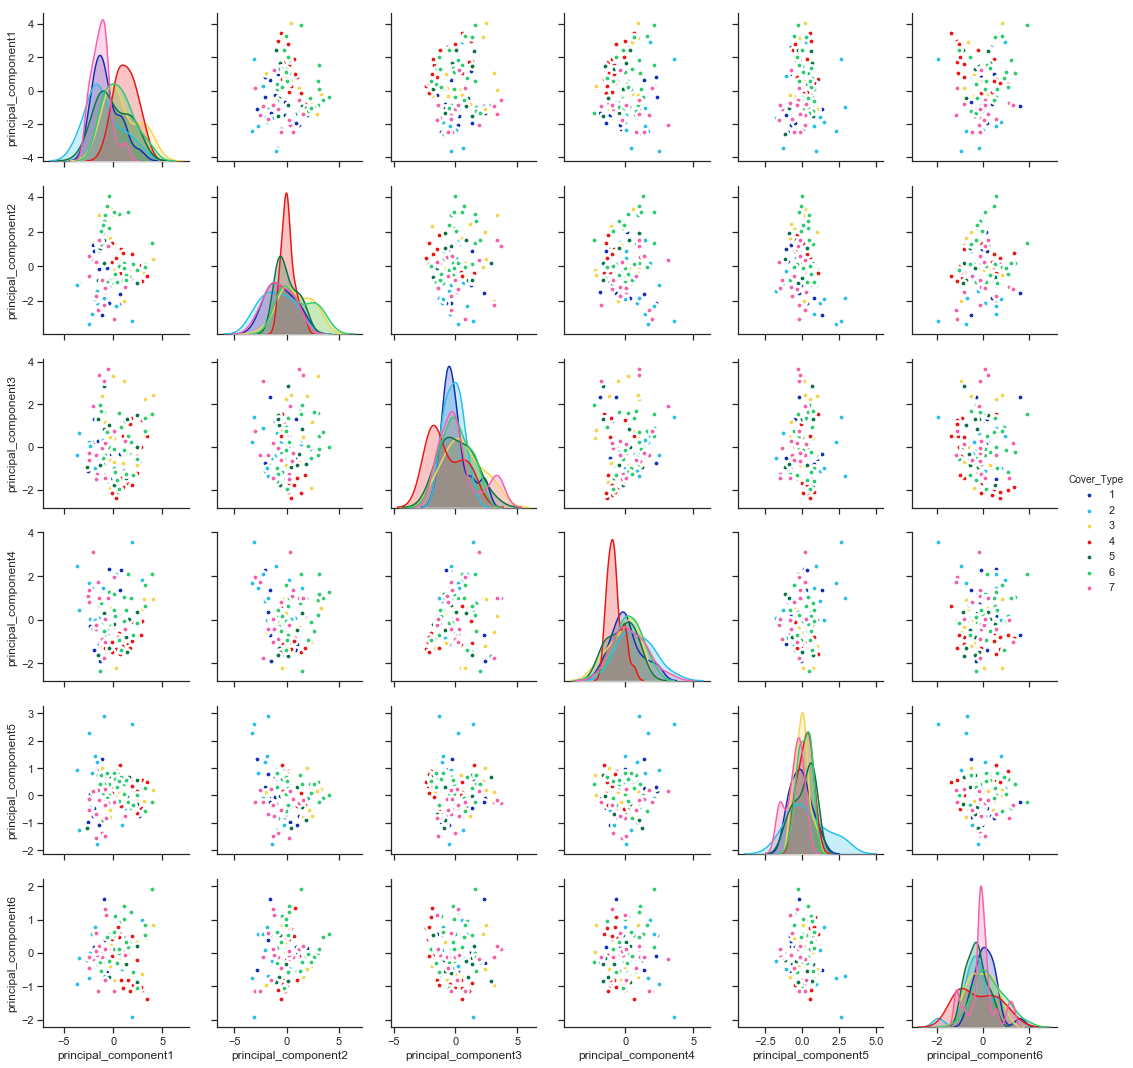

In [86]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA", "#F5D54E", "#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(sample_data, hue="Cover_Type",palette = flatui,vars = pca_columns[0:6],plot_kws=dict(s=40, #edgecolor="white",
                             linewidth=2.5))



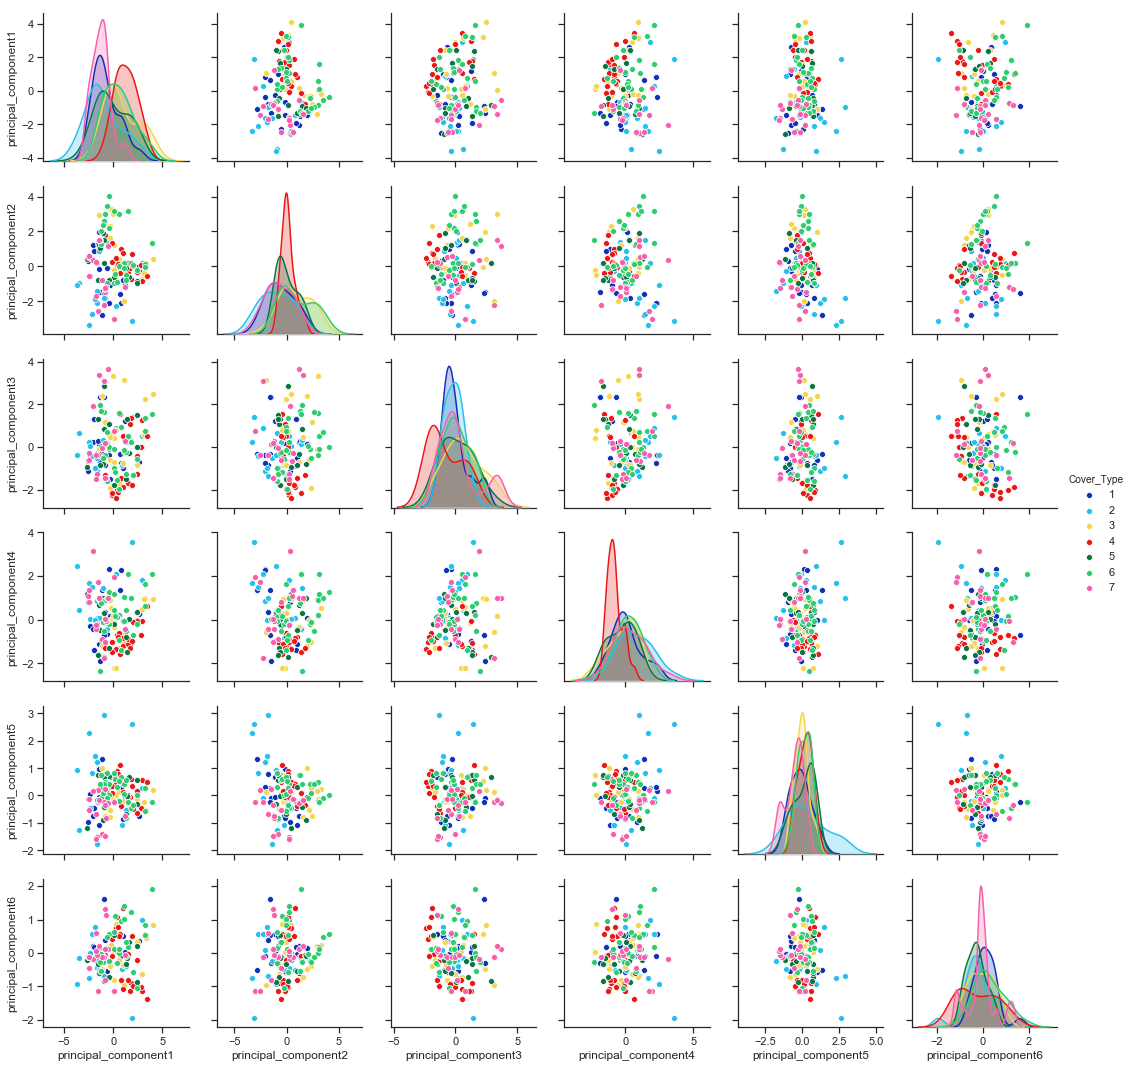

In [87]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA", "#F5D54E", "#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(sample_data, hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


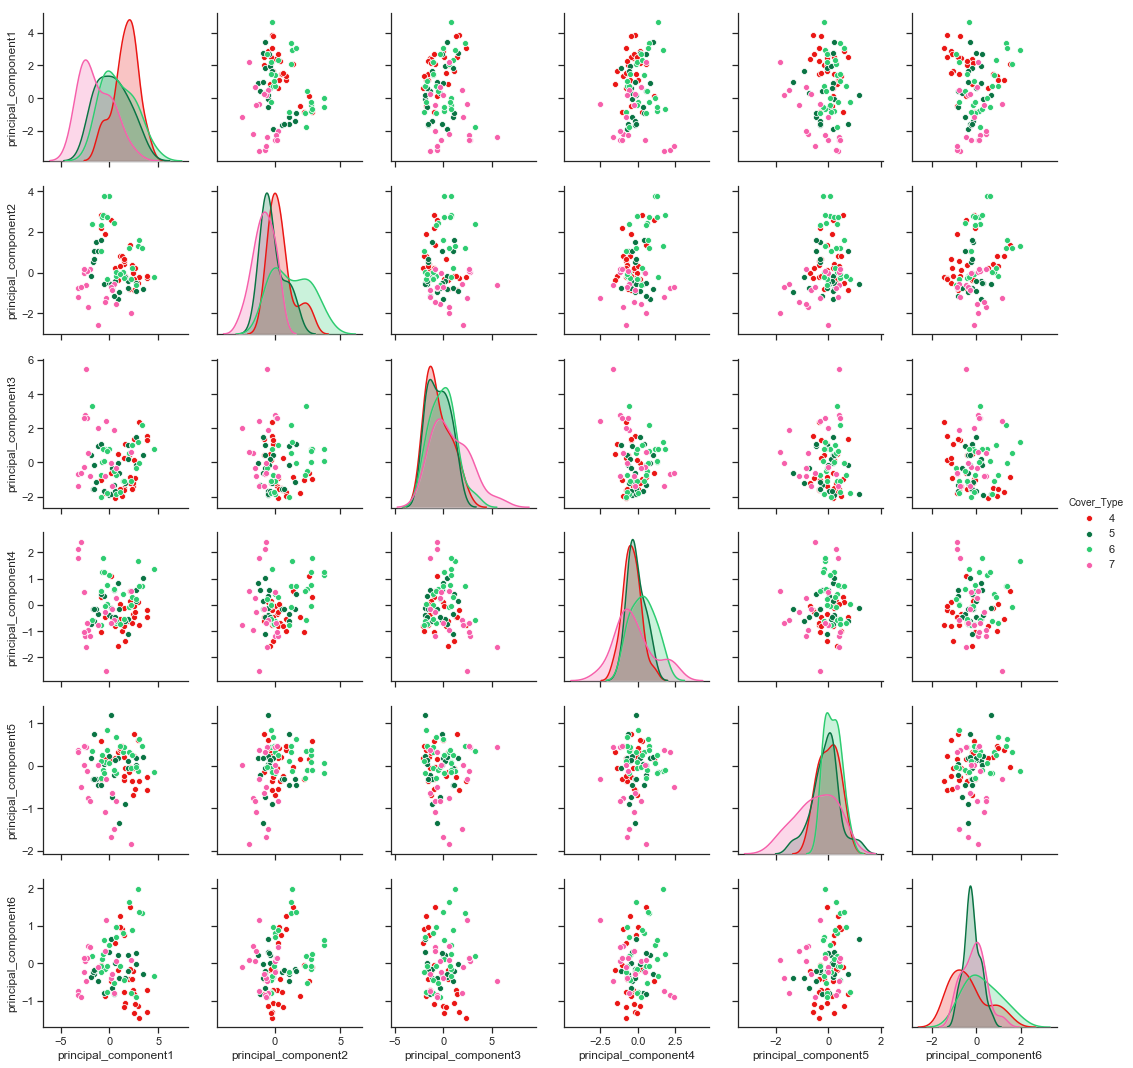

In [28]:
sns.set(style="ticks")
flatui = ["#EA1715", "#0A7444", "#2ecc71","#F660AB"]
#sns.palplot(sns.color_palette(flatui)) p
sns.pairplot(sample_data.loc[(sample_data['Cover_Type']>=4) ], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


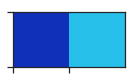

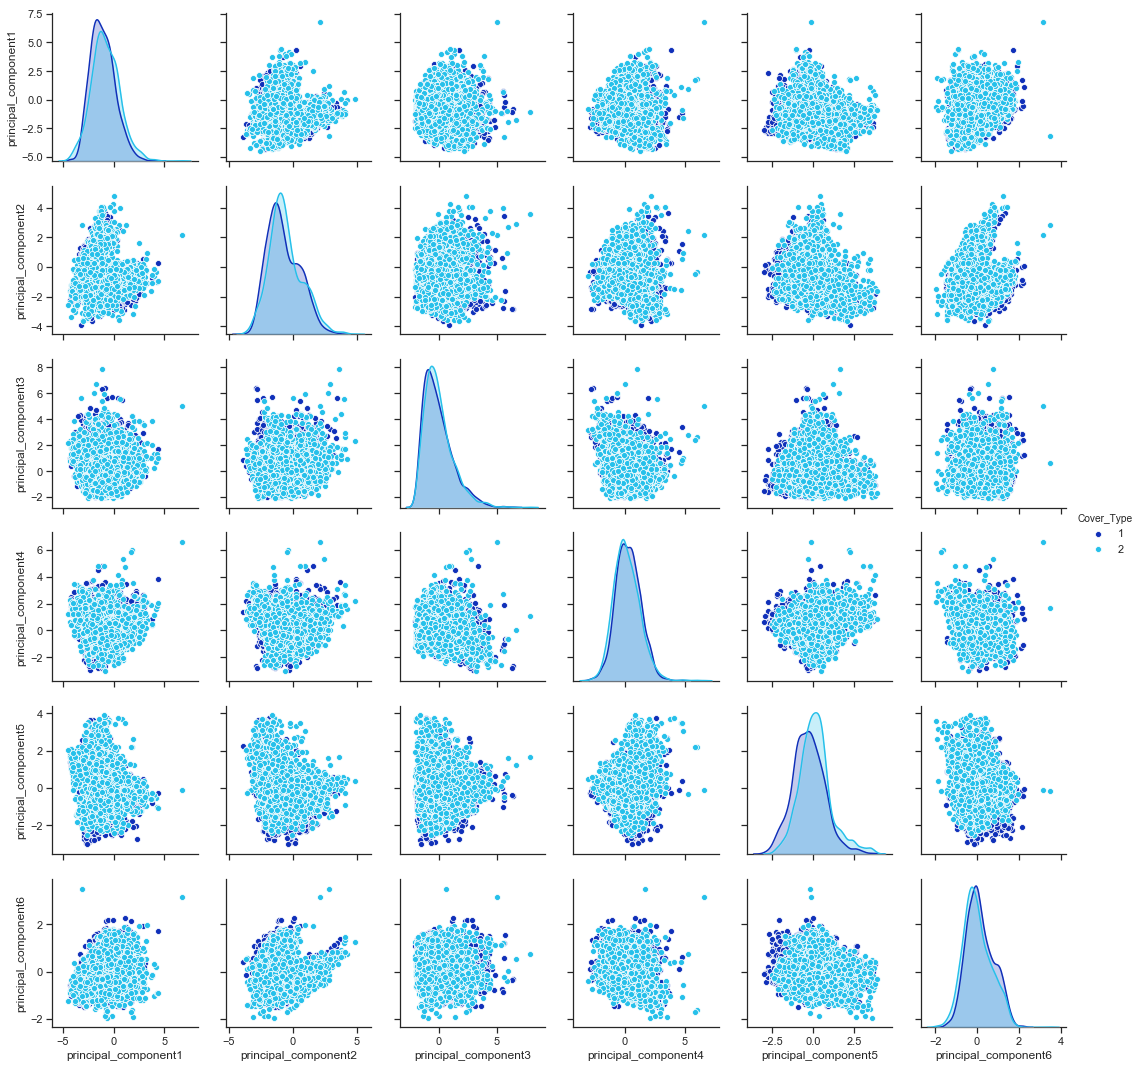

In [89]:
sns.set(style="ticks")
flatui = ['#1030B9', "#26C0EA"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']<=2) ], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


As we see in the above pictures, it is very difficult to distinguish cover type 1 and 2, using the PCA which captures only linearilty relations.

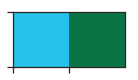

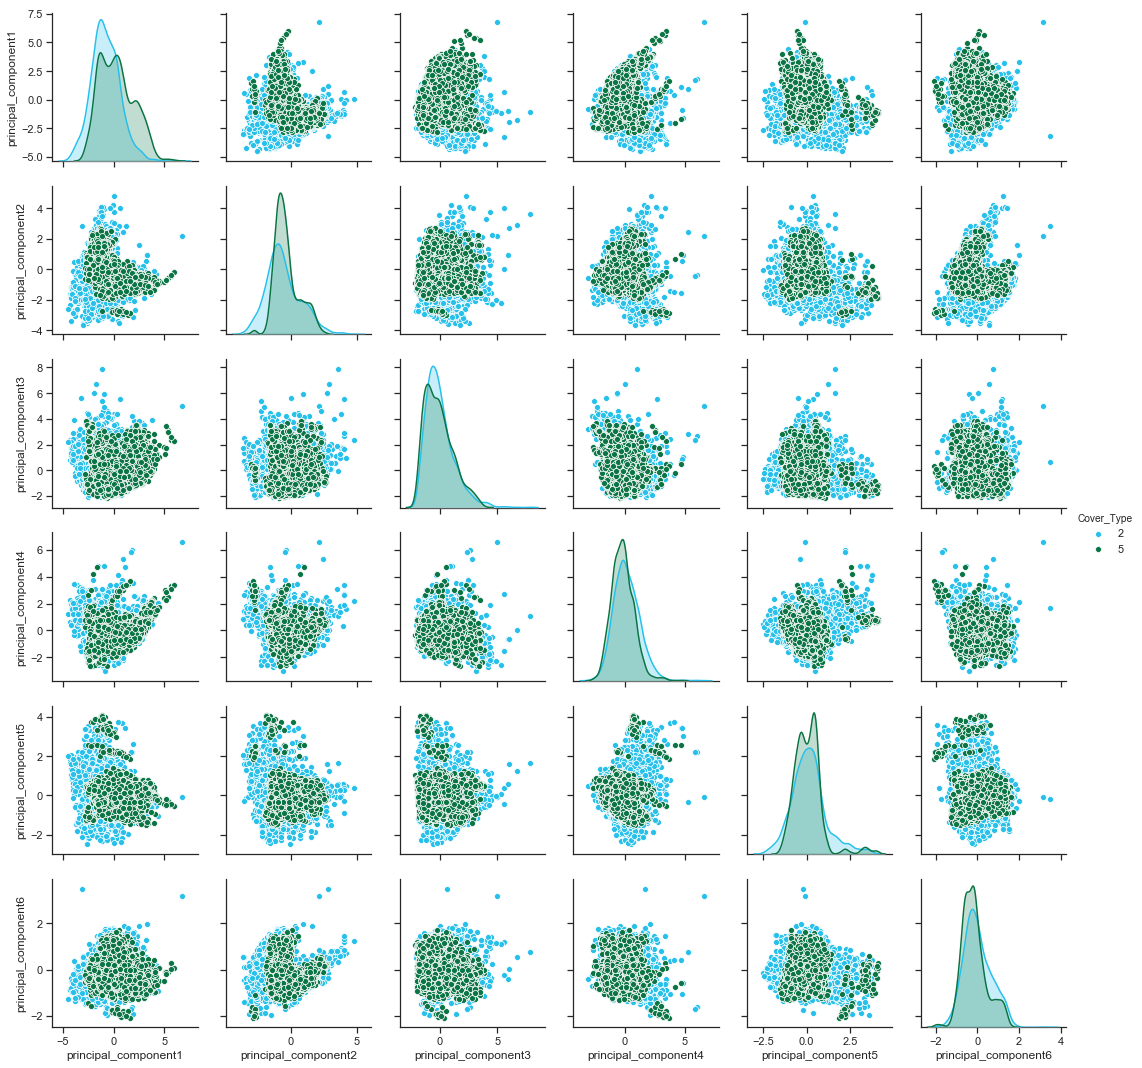

In [96]:
sns.set(style="ticks")
flatui = ["#26C0EA","#0A7444"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']==2) | (pca_data['Cover_Type']==5)], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


distiguishing cover type 2 and 5 It is easier than 1 and 2, but still some parts are not easy to distiguish.

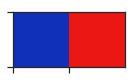

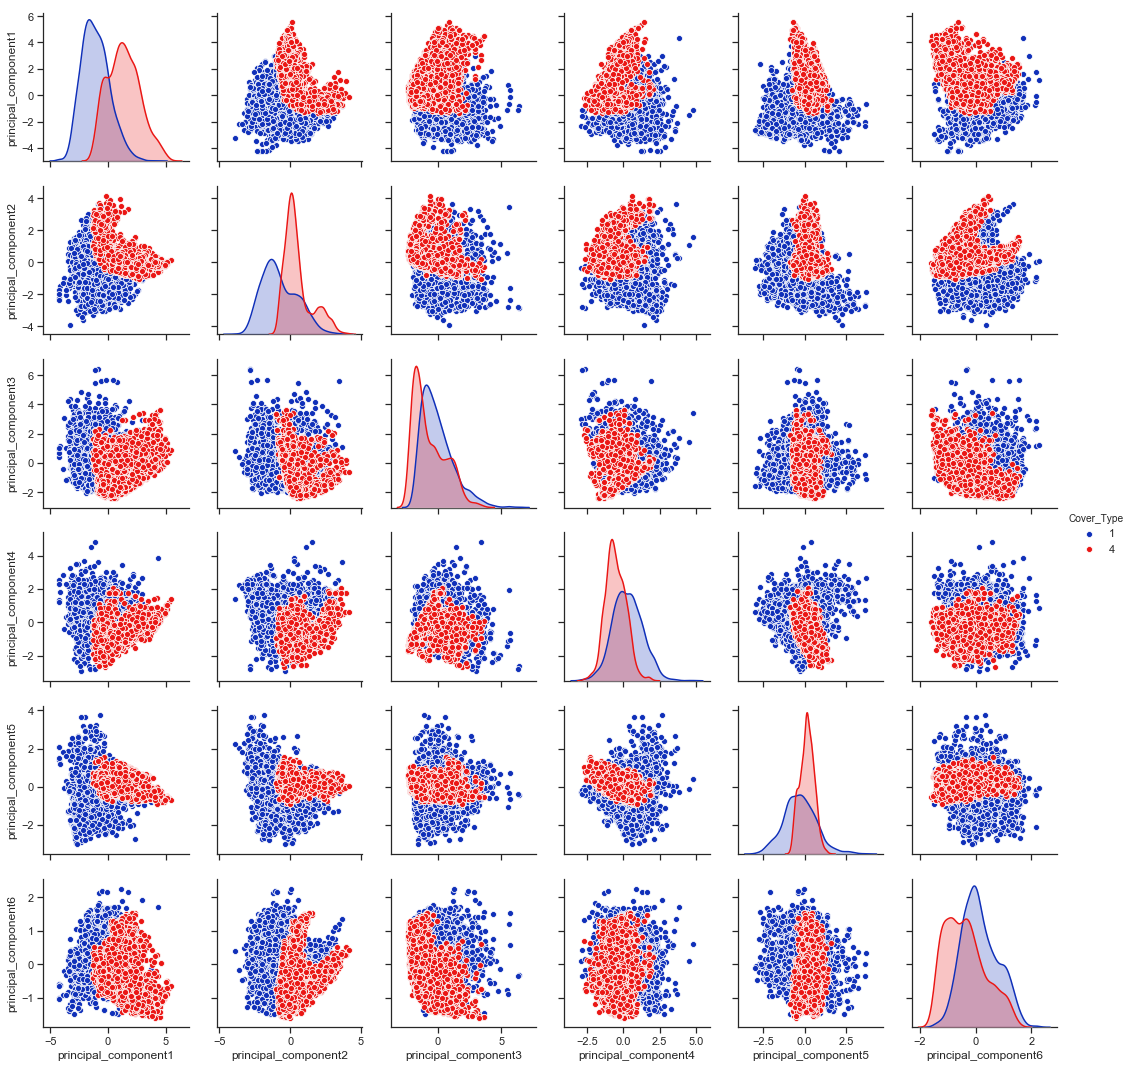

In [99]:
sns.set(style="ticks")
flatui = ['#1030B9',"#EA1715"]
sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data.loc[(pca_data['Cover_Type']==1) | (pca_data['Cover_Type']==4)], hue="Cover_Type",palette = flatui,vars = pca_columns[0:6])


Cover 1 and 4 are pretty distinguishable.